In [12]:
import numpy as np
import pandas as pd
import random
from sklearn.datasets import make_classification

import warnings
warnings.filterwarnings('ignore')

In [2]:
X, y = make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X, columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,1.663573,-0.414997,0.948130,-1.427569,0.815297,1
1,-1.205087,0.626827,1.266829,-0.831953,-1.490530,0
2,3.963959,0.281562,3.674376,1.715850,1.098220,1
3,0.111974,-0.543221,0.399996,-1.524971,1.448252,1
4,-0.673283,0.168322,-0.163448,-1.245180,-0.871395,0


In [4]:
# Function for row sampling

def sample_rows(df,percent):
    return df.sample(int(percent*df.shape[0]),replace=True)

In [8]:
sample_rows(df,0.10)

,col1,col2,col3,col4,col5,target
15,2.381733,-2.093701,1.506069,-0.731120,0.373040,0
97,-0.209253,0.690048,0.259058,-0.487308,-0.459576,0
94,2.905508,-0.880670,0.413343,-1.320261,1.276078,1
59,1.740547,-2.649940,-0.261030,-1.648295,2.267107,1
6,0.617935,1.481451,2.132916,-0.520930,0.613745,1
62,1.319840,1.173107,1.673682,-0.448693,-0.365184,1
46,-1.397380,-1.078813,2.282012,-0.373034,0.548334,1
90,-0.953723,2.215169,3.881049,-1.238390,-1.526929,0
68,1.551251,0.790431,1.667478,-0.624359,0.560645,1
4,-0.673283,0.168322,-0.163448,-1.245180,-0.871395,0


In [10]:
# Function for feature sampling

def sample_feature(df,percent):
    cols = random.sample(df.columns.tolist()[:-1], int(percent*(df.shape[1]-1)))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df

In [13]:
sample_feature(df,0.2)

,col1,target
0,1.663573,1
1,-1.205087,0
2,3.963959,1
3,0.111974,1
4,-0.673283,0
...,...,...
95,-3.633541,0
96,1.706999,1
97,-0.209253,0
98,-0.270852,1


In [15]:
sample_feature(df, 0.5)

,col2,col3,target
0,-0.414997,0.948130,1
1,0.626827,1.266829,0
2,0.281562,3.674376,1
3,-0.543221,0.399996,1
4,0.168322,-0.163448,0
...,...,...,...
95,-0.272378,1.982586,0
96,-1.233997,-0.979054,1
97,0.690048,0.259058,0
98,0.034159,2.011706,1


In [6]:
# function for combined sampling

def combined_sampling(df,row_percent,col_precent):
    new_df = sample_rows(df,row_percent)
    return sample_feature(new_df,col_precent)

In [19]:
combined_df = combined_sampling(df, 0.5, 0.5)
combined_df.shape

(50, 3)

In [20]:
df1 = sample_rows(df, 0.2)
df1

,col1,col2,col3,col4,col5,target
17,-0.574036,4.708677,0.233529,1.226013,-0.319472,0
27,-3.007764,2.159626,0.743020,0.525149,-0.636117,0
30,-0.880495,1.563274,0.407950,-1.553943,0.126953,0
86,-3.431378,1.242931,2.141153,0.890279,-2.703126,0
66,0.807783,0.055936,-1.069349,-1.342213,3.636540,1
80,0.713475,-1.633579,0.488695,-0.801592,2.313493,1
82,-0.584696,4.628019,-0.792845,1.342547,-0.264020,0
45,1.359364,0.339399,0.313616,-2.131848,0.379355,1
90,-0.953723,2.215169,3.881049,-1.238390,-1.526929,0
56,2.628681,-1.711464,1.875943,-0.523125,0.846113,1


In [21]:
df2 = sample_rows(df, 0.2)
df2

,col1,col2,col3,col4,col5,target
72,0.462069,-2.990858,-1.970885,-2.460834,3.999888,1
93,0.477286,-0.999226,-0.184606,-1.304403,2.700698,1
37,2.875288,-0.021606,3.254124,0.219770,-0.625603,1
58,-1.154011,-1.474470,0.328214,-1.339486,2.107401,1
83,-1.711488,2.362412,0.705157,0.864213,-1.290693,0
55,-1.107006,1.714408,-0.356843,-0.300888,-0.515770,0
16,-0.764177,1.525055,-0.487962,-0.879603,0.159769,0
67,3.630946,0.698648,1.076921,-0.350774,1.844799,1
49,-4.326073,1.484399,-1.008503,1.729333,-1.395808,0
33,-2.136553,-0.412630,2.426675,-1.689321,-1.148657,0


In [22]:
df3 = sample_rows(df, 0.2)
df3

,col1,col2,col3,col4,col5,target
50,1.177977,-1.442280,-0.053806,-1.843174,-0.175432,1
4,-0.673283,0.168322,-0.163448,-1.245180,-0.871395,0
45,1.359364,0.339399,0.313616,-2.131848,0.379355,1
53,2.935551,2.325196,0.320505,-3.702355,0.645923,0
75,-2.046020,1.916714,1.840274,-1.076719,-0.898488,0
41,0.867213,-0.463913,-0.381069,-1.254311,0.336012,1
0,1.663573,-0.414997,0.948130,-1.427569,0.815297,1
62,1.319840,1.173107,1.673682,-0.448693,-0.365184,1
64,1.915313,-0.703421,3.319002,0.968431,-0.615928,1
55,-1.107006,1.714408,-0.356843,-0.300888,-0.515770,0


In [23]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col1', 'col2', 'col3', 'col4', 'col5', 'target'], dtype='object')
Index(['col1', 'col2', 'col3', 'col4', 'col5', 'target'], dtype='object')
Index(['col1', 'col2', 'col3', 'col4', 'col5', 'target'], dtype='object')


In [25]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [27]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

In [28]:
from sklearn.tree import plot_tree

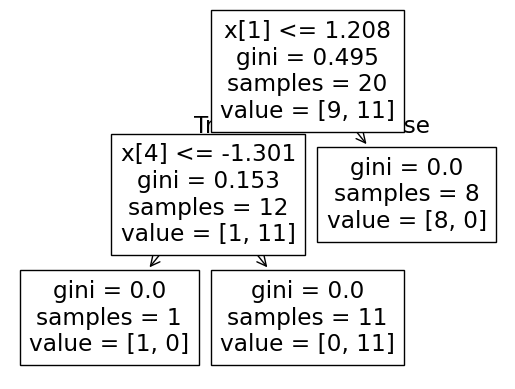

In [31]:
import matplotlib.pyplot as plt
plot_tree(clf1)
plt.show()

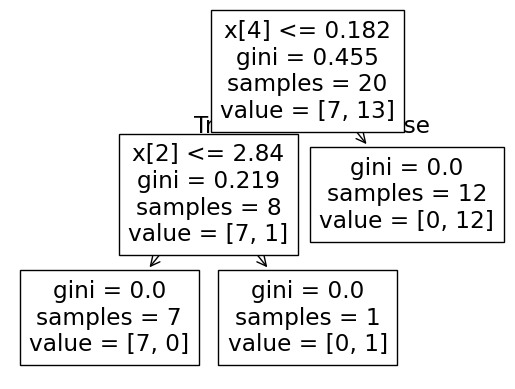

In [32]:
plot_tree(clf2)
plt.show()

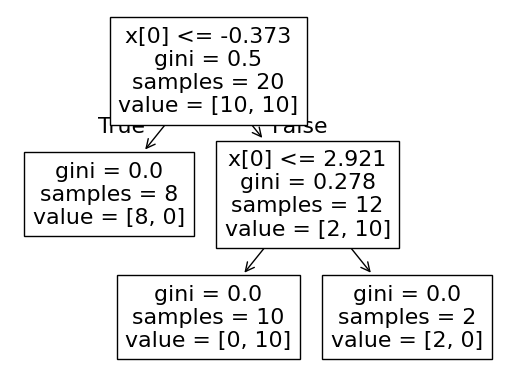

In [33]:
plot_tree(clf3)
plt.show()

In [39]:
df.sample(1)

,col1,col2,col3,col4,col5,target
89,-0.067852,-2.194148,1.933254,-0.718734,-0.260535,1


In [40]:
# 1.663573	-0.414997	0.948130	-1.427569	0.815297	1

clf1.predict(np.array([-0.067852, -2.194148, 1.933254, -0.718734, -0.260535]).reshape(1,5))

array([1])

In [41]:
clf2.predict(np.array([-0.067852, -2.194148, 1.933254, -0.718734, -0.260535]).reshape(1,5))

array([0])

In [42]:
clf3.predict(np.array([-0.067852, -2.194148, 1.933254, -0.718734, -0.260535]).reshape(1,5))

array([1])

In [43]:
# try out both row and column sampling aswell